# FBI Gun Dataset Analysis

In this analysis I am going to investigate whether or not the population of a state is correlated with the number of permit checks in that state for 2016

To start off I am going to import the relevant libraries

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

Now I am going to import my data

In [27]:
gun_df = pd.read_csv("C:/Users/khali/Downloads/Copy of gun_data.csv")
gun_df

month          state   permit  permit_recheck  handgun  long_gun  \
0      2017-09        Alabama  16717.0             0.0   5734.0    6320.0   
1      2017-09         Alaska    209.0             2.0   2320.0    2930.0   
2      2017-09        Arizona   5069.0           382.0  11063.0    7946.0   
3      2017-09       Arkansas   2935.0           632.0   4347.0    6063.0   
4      2017-09     California  57839.0             0.0  37165.0   24581.0   
...        ...            ...      ...             ...      ...       ...   
12480  1998-11       Virginia      0.0             NaN     14.0       2.0   
12481  1998-11     Washington      1.0             NaN     65.0     286.0   
12482  1998-11  West Virginia      3.0             NaN    149.0     251.0   
12483  1998-11      Wisconsin      0.0             NaN     25.0     214.0   
12484  1998-11        Wyoming      8.0             NaN     45.0      49.0   

        other  multiple  admin  prepawn_handgun  ...  returned_other  \
0       221.0       317    0.0             15.0  ...             0.0   
1       219.0       160    0.0              5.0  ...             0.0   
2       920.0       631    0.0             13.0  ...             0.0   
3       165.0       366   51.0             12.0  ...             0.0   
4      2984.0         0    0.0              0.0  ...             0.0   
...       ...       ...    ...              ...  ...             ...   
12480     NaN         8    0.0              NaN  ...             NaN   
12481     NaN         8    1.0              NaN  ...             NaN   
12482     NaN         5    0.0              NaN  ...             NaN   
12483     NaN         2    0.0              NaN  ...             NaN   
12484     NaN         5    0.0              NaN  ...             NaN   

       rentals_handgun  rentals_long_gun  private_sale_handgun  \
0                  0.0               0.0                   9.0   
1                  0.0               0.0                  17.0   
2                  0.0               0.0                  38.0   
3                  0.0               0.0                  13.0   
4                  0.0               0.0                   0.0   
...                ...               ...                   ...   
12480              NaN               NaN                   NaN   
12481              NaN               NaN                   NaN   
12482              NaN               NaN                   NaN   
12483              NaN               NaN                   NaN   
12484              NaN               NaN                   NaN   

       private_sale_long_gun  private_sale_other  return_to_seller_handgun  \
0                       16.0                 3.0                       0.0   
1                       24.0                 1.0                       0.0   
2                       12.0                 2.0                       0.0   
3                       23.0                 0.0                       0.0   
4                        0.0                 0.0                       0.0   
...                      ...                 ...                       ...   
12480                    NaN                 NaN                       NaN   
12481                    NaN                 NaN                       NaN   
12482                    NaN                 NaN                       NaN   
12483                    NaN                 NaN                       NaN   
12484                    NaN                 NaN                       NaN   

       return_to_seller_long_gun  return_to_seller_other  totals  
0                            0.0                     3.0   32019  
1                            0.0                     0.0    6303  
2                            0.0                     0.0   28394  
3                            2.0                     1.0   17747  
4                            0.0                     0.0  123506  
...                          ...                     ...     ...  
12480               

I am now going to check for duplicated values and delete them if they exist for both data sets

In [15]:
sum(gun_df.duplicated())

0

In [28]:
census_df = pd.read_csv("C:/Users/khali/Downloads/U.S. Census Data - Copy.csv")
census_df

Fact  \
0        Population estimates, July 1, 2016,  (V2016)   
1   Population estimates base, April 1, 2010,  (V2...   
2   Population, percent change - April 1, 2010 (es...   
3                   Population, Census, April 1, 2010   
4   Persons under 5 years, percent, July 1, 2016, ...   
..                                                ...   
80                                                 FN   
81                                                NaN   
82                                                  S   
83                                                  X   
84                                                  Z   

                                            Fact Note    Alabama   Alaska  \
0                                                 NaN  4,863,300  741,894   
1                                                 NaN  4,780,131  710,249   
2                                                 NaN      1.70%    4.50%   
3                                                 NaN  4,779,736  710,231   
4                                                 NaN      6.00%    7.30%   
..                                                ...        ...      ...   
80             Footnote on this item in place of data        NaN      NaN   
81                                      Not available        NaN      NaN   
82    Suppressed; does not meet publication standards        NaN      NaN   
83                                     Not applicable        NaN      NaN   
84  Value greater than zero but less than half uni...        NaN      NaN   

      Arizona   Arkansas  California   Colorado Connecticut Delaware  ...  \
0   6,931,071  2,988,248  39,250,017  5,540,545   3,576,452  952,065  ...   
1   6,392,301  2,916,025  37,254,522  5,029,324   3,574,114  897,936  ...   
2       8.40%      2.50%       5.40%     10.20%       0.10%    6.00%  ...   
3   6,392,017  2,915,918  37,253,956  5,029,196   3,574,097  897,934  ...   
4       6.30%      6.40%       6.30%      6.10%       5.20%    5.80%  ...   
..        ...        ...         ...        ...         ...      ...  ...   
80        NaN        NaN         NaN        NaN         NaN      NaN  ...   
81        NaN        NaN         NaN        NaN         NaN      NaN  ...   
82        NaN        NaN         NaN        NaN         NaN      NaN  ...   
83        NaN        NaN         NaN        NaN         NaN      NaN  ...   
84        NaN        NaN         NaN        NaN         NaN      NaN  ...   

   South Dakota Tennessee       Texas       Utah  Vermont   Virginia  \
0        865454   6651194  27,862,596  3,051,217  624,594  8,411,808   
1        814195   6346298  25,146,100  2,763,888  625,741  8,001,041   
2         0.063     0.048      10.80%     10.40%   -0.20%      5.10%   
3        814180   6346105  25,145,561  2,763,885  625,741  8,001,024   
4         0.071     0.061       7.20%      8.30%    4.90%      6.10%   
..          ...       ...         ...        ...      ...        ...   
80          NaN       NaN         NaN        NaN      NaN        NaN   
81          NaN       NaN         NaN        NaN      NaN        NaN   
82          NaN       NaN         NaN        NaN      NaN        NaN   
83          NaN       NaN         NaN        NaN      NaN        NaN   
84          NaN       NaN         NaN        NaN      NaN        NaN   

   Washington West Virginia  Wisconsin  Wyoming  
0   7,288,000     1,831,102  5,778,708  585,501  
1   6,724,545     1,853,011  5,687,289  563,767  
2       8.40%        -1.20%      1.60%    3.90%  
3   6,724,540     1,852,994  5,686,986  563,626  
4       6.20%         5.50%      5.80%    6.50%  
..        ...           ...        ...      ...  
80        NaN           NaN        NaN      NaN  
81        NaN           NaN        NaN      NaN  
82        NaN           NaN        NaN      NaN  
83        NaN           NaN        NaN      NaN  
84        NaN           NaN        NaN      NaN  

[85 rows x 52 columns]

In [55]:
sum(census_df.duplicated())

0

I see that the file is in wide format so I am going to change it to long format

In [29]:
census_long = census_df.transpose()

census_long

0   \
Fact            Population estimates, July 1, 2016,  (V2016)   
Fact Note                                                NaN   
Alabama                                            4,863,300   
Alaska                                               741,894   
Arizona                                            6,931,071   
Arkansas                                           2,988,248   
California                                        39,250,017   
Colorado                                           5,540,545   
Connecticut                                        3,576,452   
Delaware                                             952,065   
Florida                                           20,612,439   
Georgia                                           10,310,371   
Hawaii                                             1,428,557   
Idaho                                              1,683,140   
Illinois                                          12,801,539   
Indiana                                            6,633,053   
Iowa                                               3,134,693   
Kansas                                             2,907,289   
Kentucky                                           4,436,974   
Louisiana                                          4,681,666   
Maine                                              1,331,479   
Maryland                                           6,016,447   
Massachusetts                                      6,811,779   
Michigan                                           9,928,300   
Minnesota                                          5,519,952   
Mississippi                                        2,988,726   
Missouri                                           6,093,000   
Montana                                            1,042,520   
Nebraska                                           1,907,116   
Nevada                                             2,940,058   
New Hampshire                                      1,334,795   
New Jersey                                         8,944,469   
New Mexico                                           2081015   
New York                                            19745289   
North Carolina                                      10146788   
North Dakota                                          757952   
Ohio                                                11614373   
Oklahoma                                             3923561   
Oregon                                               4093465   
Pennsylvania                                        12784227   
Rhode Island                                         1056426   
South Carolina                                       4961119   
South Dakota                                          865454   
Tennessee                                            6651194   
Texas                                             27,862,596   
Utah                                               3,051,217   
Vermont                                              624,594   
Virginia                                           8,411,808   
Washington                                         7,288,000   
West Virginia                                      1,831,102   
Wisconsin                                          5,778,708   
Wyoming                                              585,501   

                                                               1   \
Fact            Population estimates base, April 1, 2010,  (V2...   
Fact Note                                                     NaN   
Alabama                                                 4,780,131   
Alaska                                                    710,249   
Arizona                                                 6,392,301   
Arkansas                                                2,916,025   
California                                             37,254,522   
Colorado                                                5,029,324   
Connecticut                                 

Here I am dropping the Fact Note column and changing the original dataset

In [30]:
census_long.drop('Fact Note', inplace = True)
census_long

0   \
Fact            Population estimates, July 1, 2016,  (V2016)   
Alabama                                            4,863,300   
Alaska                                               741,894   
Arizona                                            6,931,071   
Arkansas                                           2,988,248   
California                                        39,250,017   
Colorado                                           5,540,545   
Connecticut                                        3,576,452   
Delaware                                             952,065   
Florida                                           20,612,439   
Georgia                                           10,310,371   
Hawaii                                             1,428,557   
Idaho                                              1,683,140   
Illinois                                          12,801,539   
Indiana                                            6,633,053   
Iowa                                               3,134,693   
Kansas                                             2,907,289   
Kentucky                                           4,436,974   
Louisiana                                          4,681,666   
Maine                                              1,331,479   
Maryland                                           6,016,447   
Massachusetts                                      6,811,779   
Michigan                                           9,928,300   
Minnesota                                          5,519,952   
Mississippi                                        2,988,726   
Missouri                                           6,093,000   
Montana                                            1,042,520   
Nebraska                                           1,907,116   
Nevada                                             2,940,058   
New Hampshire                                      1,334,795   
New Jersey                                         8,944,469   
New Mexico                                           2081015   
New York                                            19745289   
North Carolina                                      10146788   
North Dakota                                          757952   
Ohio                                                11614373   
Oklahoma                                             3923561   
Oregon                                               4093465   
Pennsylvania                                        12784227   
Rhode Island                                         1056426   
South Carolina                                       4961119   
South Dakota                                          865454   
Tennessee                                            6651194   
Texas                                             27,862,596   
Utah                                               3,051,217   
Vermont                                              624,594   
Virginia                                           8,411,808   
Washington                                         7,288,000   
West Virginia                                      1,831,102   
Wisconsin                                          5,778,708   
Wyoming                                              585,501   

                                                               1   \
Fact            Population estimates base, April 1, 2010,  (V2...   
Alabama                                                 4,780,131   
Alaska                                                    710,249   
Arizona                                                 6,392,301   
Arkansas                                                2,916,025   
California                                             37,254,522   
Colorado                                                5,029,324   
Connecticut                                             3,574,114   
Delaware                                                  897,936   
Florida                                

In [31]:
census_long.columns = census_long.iloc[0]
census_long = census_long.drop(census_long.index[0])
census_long

Fact           Population estimates, July 1, 2016,  (V2016)  \
Alabama                                           4,863,300   
Alaska                                              741,894   
Arizona                                           6,931,071   
Arkansas                                          2,988,248   
California                                       39,250,017   
Colorado                                          5,540,545   
Connecticut                                       3,576,452   
Delaware                                            952,065   
Florida                                          20,612,439   
Georgia                                          10,310,371   
Hawaii                                            1,428,557   
Idaho                                             1,683,140   
Illinois                                         12,801,539   
Indiana                                           6,633,053   
Iowa                                              3,134,693   
Kansas                                            2,907,289   
Kentucky                                          4,436,974   
Louisiana                                         4,681,666   
Maine                                             1,331,479   
Maryland                                          6,016,447   
Massachusetts                                     6,811,779   
Michigan                                          9,928,300   
Minnesota                                         5,519,952   
Mississippi                                       2,988,726   
Missouri                                          6,093,000   
Montana                                           1,042,520   
Nebraska                                          1,907,116   
Nevada                                            2,940,058   
New Hampshire                                     1,334,795   
New Jersey                                        8,944,469   
New Mexico                                          2081015   
New York                                           19745289   
North Carolina                                     10146788   
North Dakota                                         757952   
Ohio                                               11614373   
Oklahoma                                            3923561   
Oregon                                              4093465   
Pennsylvania                                       12784227   
Rhode Island                                        1056426   
South Carolina                                      4961119   
South Dakota                                         865454   
Tennessee                                           6651194   
Texas                                            27,862,596   
Utah                                              3,051,217   
Vermont                                             624,594   
Virginia                                          8,411,808   
Washington                                        7,288,000   
West Virginia                                     1,831,102   
Wisconsin                                         5,778,708   
Wyoming                                             585,501   

Fact           Population estimates base, April 1, 2010,  (V2016)  \
Alabama                                                 4,780,131   
Alaska                                                    710,249   
Arizona                                                 6,392,301   
Arkansas                                                2,916,025   
California                                             37,254,522   
Colorado                                                5,029,324   
Connecticut                                             3,574,114   
Delaware                                                  897,936   
Florida                                                18,804,592   
Georgia                                                 9,688,680   
Hawaii                     

Below I am resetting the index which fixes the index going above horizontally

In [32]:
census_long.reset_index(inplace=True)

In [24]:
census_long

Fact           index Population estimates, July 1, 2016,  (V2016)  \
0            Alabama                                    4,863,300   
1             Alaska                                      741,894   
2            Arizona                                    6,931,071   
3           Arkansas                                    2,988,248   
4         California                                   39,250,017   
5           Colorado                                    5,540,545   
6        Connecticut                                    3,576,452   
7           Delaware                                      952,065   
8            Florida                                   20,612,439   
9            Georgia                                   10,310,371   
10            Hawaii                                    1,428,557   
11             Idaho                                    1,683,140   
12          Illinois                                   12,801,539   
13           Indiana                                    6,633,053   
14              Iowa                                    3,134,693   
15            Kansas                                    2,907,289   
16          Kentucky                                    4,436,974   
17         Louisiana                                    4,681,666   
18             Maine                                    1,331,479   
19          Maryland                                    6,016,447   
20     Massachusetts                                    6,811,779   
21          Michigan                                    9,928,300   
22         Minnesota                                    5,519,952   
23       Mississippi                                    2,988,726   
24          Missouri                                    6,093,000   
25           Montana                                    1,042,520   
26          Nebraska                                    1,907,116   
27            Nevada                                    2,940,058   
28     New Hampshire                                    1,334,795   
29        New Jersey                                    8,944,469   
30        New Mexico                                      2081015   
31          New York                                     19745289   
32    North Carolina                                     10146788   
33      North Dakota                                       757952   
34              Ohio                                     11614373   
35          Oklahoma                                      3923561   
36            Oregon                                      4093465   
37      Pennsylvania                                     12784227   
38      Rhode Island                                      1056426   
39    South Carolina                                      4961119   
40      South Dakota                                       865454   
41         Tennessee                                      6651194   
42             Texas                                   27,862,596   
43              Utah                                    3,051,217   
44           Vermont                                      624,594   
45          Virginia                                    8,411,808   
46        Washington                                    7,288,000   
47     West Virginia                                    1,831,102   
48         Wisconsin                                    5,778,708   
49           Wyoming                                      585,501   

Fact Population estimates base, April 1, 2010,  (V2016)  \
0                                             4,780,131   
1                                               710,249   
2                                             6,392,301   
3                                             2,916,025   
4                                            37,254,522   
5                                             5,029,324   
6                                             3,574,114   
7       

I am now creating a dataframe with only the state and 2016 population columns for further analysis

In [36]:
census_long.rename(columns={'index': 'State'}, inplace=True)

In [37]:
census_2016 = census_long[['State', 'Population estimates, July 1, 2016,  (V2016)']]
census_2016

Fact           State Population estimates, July 1, 2016,  (V2016)
0            Alabama                                    4,863,300
1             Alaska                                      741,894
2            Arizona                                    6,931,071
3           Arkansas                                    2,988,248
4         California                                   39,250,017
5           Colorado                                    5,540,545
6        Connecticut                                    3,576,452
7           Delaware                                      952,065
8            Florida                                   20,612,439
9            Georgia                                   10,310,371
10            Hawaii                                    1,428,557
11             Idaho                                    1,683,140
12          Illinois                                   12,801,539
13           Indiana                                    6,633,053
14              Iowa                                    3,134,693
15            Kansas                                    2,907,289
16          Kentucky                                    4,436,974
17         Louisiana                                    4,681,666
18             Maine                                    1,331,479
19          Maryland                                    6,016,447
20     Massachusetts                                    6,811,779
21          Michigan                                    9,928,300
22         Minnesota                                    5,519,952
23       Mississippi                                    2,988,726
24          Missouri                                    6,093,000
25           Montana                                    1,042,520
26          Nebraska                                    1,907,116
27            Nevada                                    2,940,058
28     New Hampshire                                    1,334,795
29        New Jersey                                    8,944,469
30        New Mexico                                      2081015
31          New York                                     19745289
32    North Carolina                                     10146788
33      North Dakota                                       757952
34              Ohio                                     11614373
35          Oklahoma                                      3923561
36            Oregon                                      4093465
37      Pennsylvania                                     12784227
38      Rhode Island                                      1056426
39    South Carolina                                      4961119
40      South Dakota                                       865454
41         Tennessee                                      6651194
42             Texas                                   27,862,596
43              Utah                                    3,051,217
44           Vermont                                      624,594
45          Virginia                                    8,411,808
46        Washington                                    7,288,000
47     West Virginia                                    1,831,102
48         Wisconsin                                    5,778,708
49           Wyoming                                      585,501

Here I am changing the column type for the 2016 population to be an integer by removing the commas and converting it

In [38]:
census_2016.loc[:, 'Population estimates, July 1, 2016,  (V2016)'] = census_2016['Population estimates, July 1, 2016,  (V2016)'].str.replace(',', '').astype(int)

In [39]:
census_2016

Fact           State Population estimates, July 1, 2016,  (V2016)
0            Alabama                                      4863300
1             Alaska                                       741894
2            Arizona                                      6931071
3           Arkansas                                      2988248
4         California                                     39250017
5           Colorado                                      5540545
6        Connecticut                                      3576452
7           Delaware                                       952065
8            Florida                                     20612439
9            Georgia                                     10310371
10            Hawaii                                      1428557
11             Idaho                                      1683140
12          Illinois                                     12801539
13           Indiana                                      6633053
14              Iowa                                      3134693
15            Kansas                                      2907289
16          Kentucky                                      4436974
17         Louisiana                                      4681666
18             Maine                                      1331479
19          Maryland                                      6016447
20     Massachusetts                                      6811779
21          Michigan                                      9928300
22         Minnesota                                      5519952
23       Mississippi                                      2988726
24          Missouri                                      6093000
25           Montana                                      1042520
26          Nebraska                                      1907116
27            Nevada                                      2940058
28     New Hampshire                                      1334795
29        New Jersey                                      8944469
30        New Mexico                                      2081015
31          New York                                     19745289
32    North Carolina                                     10146788
33      North Dakota                                       757952
34              Ohio                                     11614373
35          Oklahoma                                      3923561
36            Oregon                                      4093465
37      Pennsylvania                                     12784227
38      Rhode Island                                      1056426
39    South Carolina                                      4961119
40      South Dakota                                       865454
41         Tennessee                                      6651194
42             Texas                                     27862596
43              Utah                                      3051217
44           Vermont                                       624594
45          Virginia                                      8411808
46        Washington                                      7288000
47     West Virginia                                      1831102
48         Wisconsin                                      5778708
49           Wyoming                                       585501

Now I am going to get the 2016 data from the FBI gun data set

In [40]:
gun_df

month          state   permit  permit_recheck  handgun  long_gun  \
0      2017-09        Alabama  16717.0             0.0   5734.0    6320.0   
1      2017-09         Alaska    209.0             2.0   2320.0    2930.0   
2      2017-09        Arizona   5069.0           382.0  11063.0    7946.0   
3      2017-09       Arkansas   2935.0           632.0   4347.0    6063.0   
4      2017-09     California  57839.0             0.0  37165.0   24581.0   
...        ...            ...      ...             ...      ...       ...   
12480  1998-11       Virginia      0.0             NaN     14.0       2.0   
12481  1998-11     Washington      1.0             NaN     65.0     286.0   
12482  1998-11  West Virginia      3.0             NaN    149.0     251.0   
12483  1998-11      Wisconsin      0.0             NaN     25.0     214.0   
12484  1998-11        Wyoming      8.0             NaN     45.0      49.0   

        other  multiple  admin  prepawn_handgun  ...  returned_other  \
0       221.0       317    0.0             15.0  ...             0.0   
1       219.0       160    0.0              5.0  ...             0.0   
2       920.0       631    0.0             13.0  ...             0.0   
3       165.0       366   51.0             12.0  ...             0.0   
4      2984.0         0    0.0              0.0  ...             0.0   
...       ...       ...    ...              ...  ...             ...   
12480     NaN         8    0.0              NaN  ...             NaN   
12481     NaN         8    1.0              NaN  ...             NaN   
12482     NaN         5    0.0              NaN  ...             NaN   
12483     NaN         2    0.0              NaN  ...             NaN   
12484     NaN         5    0.0              NaN  ...             NaN   

       rentals_handgun  rentals_long_gun  private_sale_handgun  \
0                  0.0               0.0                   9.0   
1                  0.0               0.0                  17.0   
2                  0.0               0.0                  38.0   
3                  0.0               0.0                  13.0   
4                  0.0               0.0                   0.0   
...                ...               ...                   ...   
12480              NaN               NaN                   NaN   
12481              NaN               NaN                   NaN   
12482              NaN               NaN                   NaN   
12483              NaN               NaN                   NaN   
12484              NaN               NaN                   NaN   

       private_sale_long_gun  private_sale_other  return_to_seller_handgun  \
0                       16.0                 3.0                       0.0   
1                       24.0                 1.0                       0.0   
2                       12.0                 2.0                       0.0   
3                       23.0                 0.0                       0.0   
4                        0.0                 0.0                       0.0   
...                      ...                 ...                       ...   
12480                    NaN                 NaN                       NaN   
12481                    NaN                 NaN                       NaN   
12482                    NaN                 NaN                       NaN   
12483                    NaN                 NaN                       NaN   
12484                    NaN                 NaN                       NaN   

       return_to_seller_long_gun  return_to_seller_other  totals  
0                            0.0                     3.0   32019  
1                            0.0                     0.0    6303  
2                            0.0                     0.0   28394  
3                            2.0                     1.0   17747  
4                            0.0                     0.0  123506  
...                          ...                     ...     ...  
12480               

In [43]:
gun_df_2016 = gun_df[gun_df['month'].str.startswith('2016')]
gun_df_2016

month          state   permit  permit_recheck  handgun  long_gun  \
495   2016-12        Alabama  26996.0             0.0  13733.0   17519.0   
496   2016-12         Alaska    254.0             0.0   4087.0    3698.0   
497   2016-12        Arizona   8900.0           121.0  18024.0   13785.0   
498   2016-12       Arkansas   3294.0           692.0   9192.0   13433.0   
499   2016-12     California  61808.0             0.0  63649.0   93224.0   
...       ...            ...      ...             ...      ...       ...   
1150  2016-01       Virginia    524.0             NaN  27033.0   15699.0   
1151  2016-01     Washington  19688.0             NaN  20427.0   11355.0   
1152  2016-01  West Virginia   3378.0             NaN   7419.0    5505.0   
1153  2016-01      Wisconsin   9496.0             NaN  17969.0   10756.0   
1154  2016-01        Wyoming    959.0             NaN   2181.0    1983.0   

        other  multiple  admin  prepawn_handgun  ...  returned_other  \
495     376.0       533    0.0             10.0  ...             0.0   
496     243.0       191    0.0              3.0  ...             0.0   
497    1180.0       703    0.0             10.0  ...             0.0   
498     277.0       385   37.0              4.0  ...             0.0   
499   77929.0         0    0.0              0.0  ...             0.0   
...       ...       ...    ...              ...  ...             ...   
1150    922.0         0    0.0              0.0  ...             0.0   
1151   2147.0       595    4.0             10.0  ...             9.0   
1152    321.0       349    3.0              5.0  ...             0.0   
1153    937.0        42    0.0              0.0  ...             1.0   
1154    160.0       104    8.0              2.0  ...             0.0   

      rentals_handgun  rentals_long_gun  private_sale_handgun  \
495               0.0               0.0                   2.0   
496               0.0               0.0                   0.0   
497               0.0               0.0                   2.0   
498               0.0               0.0                   2.0   
499               0.0               0.0                   0.0   
...               ...               ...                   ...   
1150              NaN               NaN                   0.0   
1151              NaN               NaN                 555.0   
1152              NaN               NaN                   5.0   
1153              NaN               NaN                   6.0   
1154              NaN               NaN                   3.0   

      private_sale_long_gun  private_sale_other  return_to_seller_handgun  \
495                     2.0                 1.0                       0.0   
496                     0.0                 0.0                       0.0   
497                     2.0                 0.0                       0.0   
498                     7.0                 0.0                       0.0   
499                     0.0                 0.0                       0.0   
...                     ...                 ...                       ...   
1150                    0.0                 0.0                       0.0   
1151                  458.0                29.0                       5.0   
1152                    7.0                 2.0                       0.0   
1153                    5.0                 0.0                       0.0   
1154                    3.0                 0.0                       0.0   

      return_to_seller_long_gun  return_to_seller_other  totals  
495                         0.0                     0.0   62014  
496                         0.0                     0.0    8786  
497                         0.0                     0.0   44887  
498                         0.0                     0.0   29926  
499                         0.0                     0.0  298161  
...                         ...                     ...     ...  
1150                        0.0                     0.0   4418

I am now going to sum the permit checks for each state and create a new dataframe with the values

In [44]:
gun_df_2016_grouped = gun_df_2016.groupby('state')['permit'].sum().reset_index()
gun_df_2016_grouped

state     permit
0                Alabama   291039.0
1                 Alaska     3121.0
2                Arizona    87771.0
3               Arkansas    55456.0
4             California  1036981.0
5               Colorado    85087.0
6            Connecticut   148949.0
7               Delaware     8440.0
8   District of Columbia      144.0
9                Florida   337086.0
10               Georgia   233115.0
11                  Guam        0.0
12                Hawaii    16627.0
13                 Idaho    38086.0
14              Illinois   962930.0
15               Indiana   946912.0
16                  Iowa   161841.0
17                Kansas    19402.0
18              Kentucky  3372613.0
19             Louisiana    35141.0
20                 Maine     6986.0
21       Mariana Islands        0.0
22              Maryland    36025.0
23         Massachusetts    97516.0
24              Michigan   251162.0
25             Minnesota   350315.0
26           Mississippi    22564.0
27              Missouri    90972.0
28               Montana    20512.0
29              Nebraska    58386.0
30                Nevada    30950.0
31         New Hampshire    48347.0
32            New Jersey        0.0
33            New Mexico    14149.0
34              New York    49646.0
35        North Carolina   345364.0
36          North Dakota    13240.0
37                  Ohio   167449.0
38              Oklahoma        0.0
39                Oregon     2903.0
40          Pennsylvania   333755.0
41           Puerto Rico        0.0
42          Rhode Island        0.0
43        South Carolina   149428.0
44          South Dakota    16279.0
45             Tennessee   106082.0
46                 Texas   390462.0
47                  Utah   178393.0
48               Vermont        0.0
49        Virgin Islands      759.0
50              Virginia     9817.0
51            Washington   268274.0
52         West Virginia    26806.0
53             Wisconsin   199431.0
54               Wyoming     7938.0

I am now merging both cleaned datasets into one final dataset called final_df

In [45]:
final_df = pd.merge(gun_df_2016_grouped, census_2016, left_on='state', right_on='State')

In [46]:
final_df

state     permit           State  \
0          Alabama   291039.0         Alabama   
1           Alaska     3121.0          Alaska   
2          Arizona    87771.0         Arizona   
3         Arkansas    55456.0        Arkansas   
4       California  1036981.0      California   
5         Colorado    85087.0        Colorado   
6      Connecticut   148949.0     Connecticut   
7         Delaware     8440.0        Delaware   
8          Florida   337086.0         Florida   
9          Georgia   233115.0         Georgia   
10          Hawaii    16627.0          Hawaii   
11           Idaho    38086.0           Idaho   
12        Illinois   962930.0        Illinois   
13         Indiana   946912.0         Indiana   
14            Iowa   161841.0            Iowa   
15          Kansas    19402.0          Kansas   
16        Kentucky  3372613.0        Kentucky   
17       Louisiana    35141.0       Louisiana   
18           Maine     6986.0           Maine   
19        Maryland    36025.0        Maryland   
20   Massachusetts    97516.0   Massachusetts   
21        Michigan   251162.0        Michigan   
22       Minnesota   350315.0       Minnesota   
23     Mississippi    22564.0     Mississippi   
24        Missouri    90972.0        Missouri   
25         Montana    20512.0         Montana   
26        Nebraska    58386.0        Nebraska   
27          Nevada    30950.0          Nevada   
28   New Hampshire    48347.0   New Hampshire   
29      New Jersey        0.0      New Jersey   
30      New Mexico    14149.0      New Mexico   
31        New York    49646.0        New York   
32  North Carolina   345364.0  North Carolina   
33    North Dakota    13240.0    North Dakota   
34            Ohio   167449.0            Ohio   
35        Oklahoma        0.0        Oklahoma   
36          Oregon     2903.0          Oregon   
37    Pennsylvania   333755.0    Pennsylvania   
38    Rhode Island        0.0    Rhode Island   
39  South Carolina   149428.0  South Carolina   
40    South Dakota    16279.0    South Dakota   
41       Tennessee   106082.0       Tennessee   
42           Texas   390462.0           Texas   
43            Utah   178393.0            Utah   
44         Vermont        0.0         Vermont   
45        Virginia     9817.0        Virginia   
46      Washington   268274.0      Washington   
47   West Virginia    26806.0   West Virginia   
48       Wisconsin   199431.0       Wisconsin   
49         Wyoming     7938.0         Wyoming   

   Population estimates, July 1, 2016,  (V2016)  
0                                       4863300  
1                                        741894  
2                                       6931071  
3                                       2988248  
4                                      39250017  
5                                       5540545  
6                                       3576452  
7                                        952065  
8                                      20612439  
9                                      10310371  
10                                      1428557  
11                                      1683140  
12                                     12801539  
13                                      6633053  
14                                      3134693  
15                                      2907289  
16                                      4436974  
17                                      4681666  
18                                      1331479  
19                                      6016447  
20                                      6811779  
21                                      9928300  
22                                      5519952  
23                                      2988726  
24                                      6093000  
25                                      1042520  
26                                      1907116  
27                                      2940058  
28                                      1334795  
29           

In [47]:
final_df.drop('State', axis=1, inplace=True)
final_df

state     permit Population estimates, July 1, 2016,  (V2016)
0          Alabama   291039.0                                      4863300
1           Alaska     3121.0                                       741894
2          Arizona    87771.0                                      6931071
3         Arkansas    55456.0                                      2988248
4       California  1036981.0                                     39250017
5         Colorado    85087.0                                      5540545
6      Connecticut   148949.0                                      3576452
7         Delaware     8440.0                                       952065
8          Florida   337086.0                                     20612439
9          Georgia   233115.0                                     10310371
10          Hawaii    16627.0                                      1428557
11           Idaho    38086.0                                      1683140
12        Illinois   962930.0                                     12801539
13         Indiana   946912.0                                      6633053
14            Iowa   161841.0                                      3134693
15          Kansas    19402.0                                      2907289
16        Kentucky  3372613.0                                      4436974
17       Louisiana    35141.0                                      4681666
18           Maine     6986.0                                      1331479
19        Maryland    36025.0                                      6016447
20   Massachusetts    97516.0                                      6811779
21        Michigan   251162.0                                      9928300
22       Minnesota   350315.0                                      5519952
23     Mississippi    22564.0                                      2988726
24        Missouri    90972.0                                      6093000
25         Montana    20512.0                                      1042520
26        Nebraska    58386.0                                      1907116
27          Nevada    30950.0                                      2940058
28   New Hampshire    48347.0                                      1334795
29      New Jersey        0.0                                      8944469
30      New Mexico    14149.0                                      2081015
31        New York    49646.0                                     19745289
32  North Carolina   345364.0                                     10146788
33    North Dakota    13240.0                                       757952
34            Ohio   167449.0                                     11614373
35        Oklahoma        0.0                                      3923561
36          Oregon     2903.0                                      4093465
37    Pennsylvania   333755.0                                     12784227
38    Rhode Island        0.0                                      1056426
39  South Carolina   149428.0                                      4961119
40    South Dakota    16279.0                                       865454
41       Tennessee   106082.0                                      6651194
42           Texas   390462.0                                     27862596
43            Utah   178393.0                                      3051217
44         Vermont        0.0                                       624594
45        Virginia     9817.0                                      8411808
46      Washington   268274.0                                      7288000
47   West Virginia    26806.0                                      1831102
48       Wisconsin   199431.0                                      5778708
49         Wyoming     7938.0                                       585501

In [49]:
final_df.rename(columns={'Population estimates, July 1, 2016,  (V2016)': 'Population'}, inplace=True)

In [50]:
final_df

state     permit Population
0          Alabama   291039.0    4863300
1           Alaska     3121.0     741894
2          Arizona    87771.0    6931071
3         Arkansas    55456.0    2988248
4       California  1036981.0   39250017
5         Colorado    85087.0    5540545
6      Connecticut   148949.0    3576452
7         Delaware     8440.0     952065
8          Florida   337086.0   20612439
9          Georgia   233115.0   10310371
10          Hawaii    16627.0    1428557
11           Idaho    38086.0    1683140
12        Illinois   962930.0   12801539
13         Indiana   946912.0    6633053
14            Iowa   161841.0    3134693
15          Kansas    19402.0    2907289
16        Kentucky  3372613.0    4436974
17       Louisiana    35141.0    4681666
18           Maine     6986.0    1331479
19        Maryland    36025.0    6016447
20   Massachusetts    97516.0    6811779
21        Michigan   251162.0    9928300
22       Minnesota   350315.0    5519952
23     Mississippi    22564.0    2988726
24        Missouri    90972.0    6093000
25         Montana    20512.0    1042520
26        Nebraska    58386.0    1907116
27          Nevada    30950.0    2940058
28   New Hampshire    48347.0    1334795
29      New Jersey        0.0    8944469
30      New Mexico    14149.0    2081015
31        New York    49646.0   19745289
32  North Carolina   345364.0   10146788
33    North Dakota    13240.0     757952
34            Ohio   167449.0   11614373
35        Oklahoma        0.0    3923561
36          Oregon     2903.0    4093465
37    Pennsylvania   333755.0   12784227
38    Rhode Island        0.0    1056426
39  South Carolina   149428.0    4961119
40    South Dakota    16279.0     865454
41       Tennessee   106082.0    6651194
42           Texas   390462.0   27862596
43            Utah   178393.0    3051217
44         Vermont        0.0     624594
45        Virginia     9817.0    8411808
46      Washington   268274.0    7288000
47   West Virginia    26806.0    1831102
48       Wisconsin   199431.0    5778708
49         Wyoming     7938.0     585501

I am now going to create a bar chart with the population of the states

Below are some links to some resources that helped me create this bar graph:

https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots

https://matplotlib.org/stable/gallery/ticks/tick-formatters.html

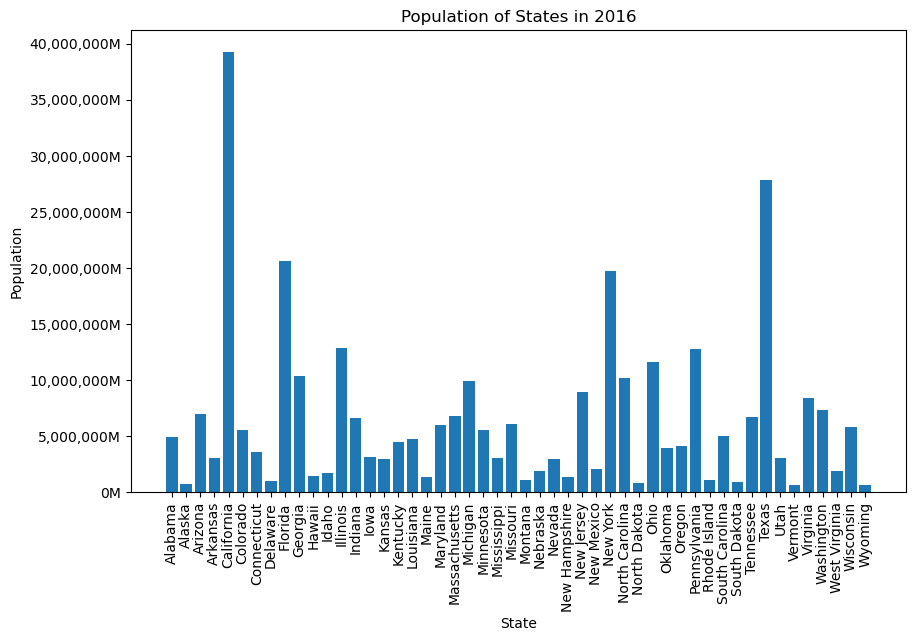

In [51]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(final_df['state'], final_df['Population'])

fmt = '{x:,.0f}M'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.set_xlabel('State')
ax.set_ylabel('Population')
ax.set_title('Population of States in 2016')
plt.xticks(rotation=90)
plt.show()


Now I am going to create a bar chart that displays the number of checks per state in 2016

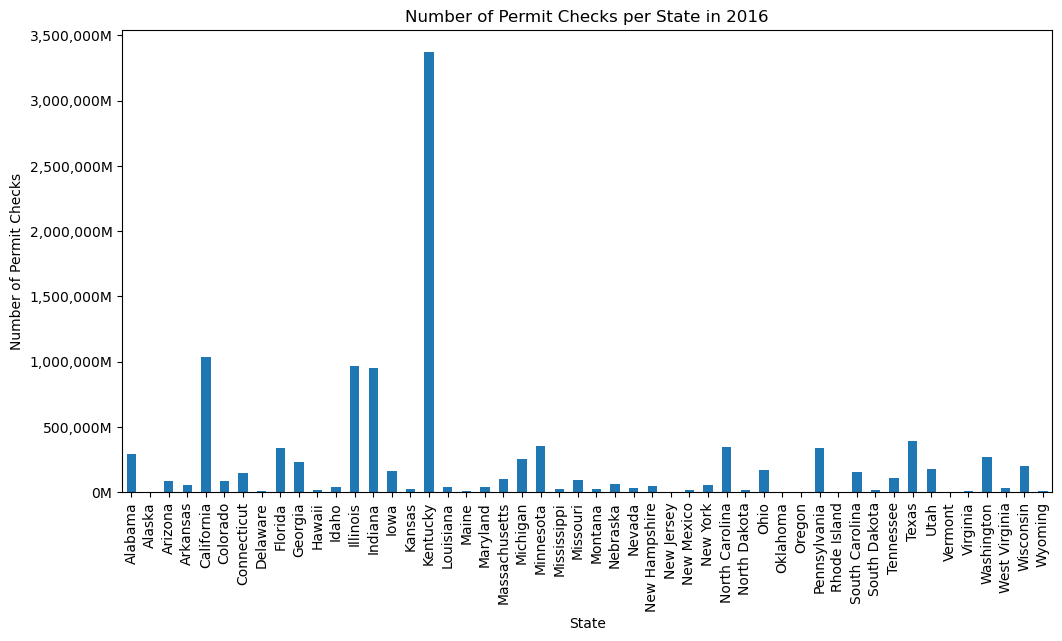

In [52]:
fig, ax = plt.subplots(figsize=(12, 6))

final_df.plot(kind='bar', x='state', y='permit', ax=ax, legend = False)

fmt = '{x:,.0f}M'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

ax.set_xlabel('State')
ax.set_ylabel('Number of Permit Checks')
ax.set_title('Number of Permit Checks per State in 2016')

plt.show()

Now I am going to create a scatter plot to illustrate the relationship between population size and the number of permit checks

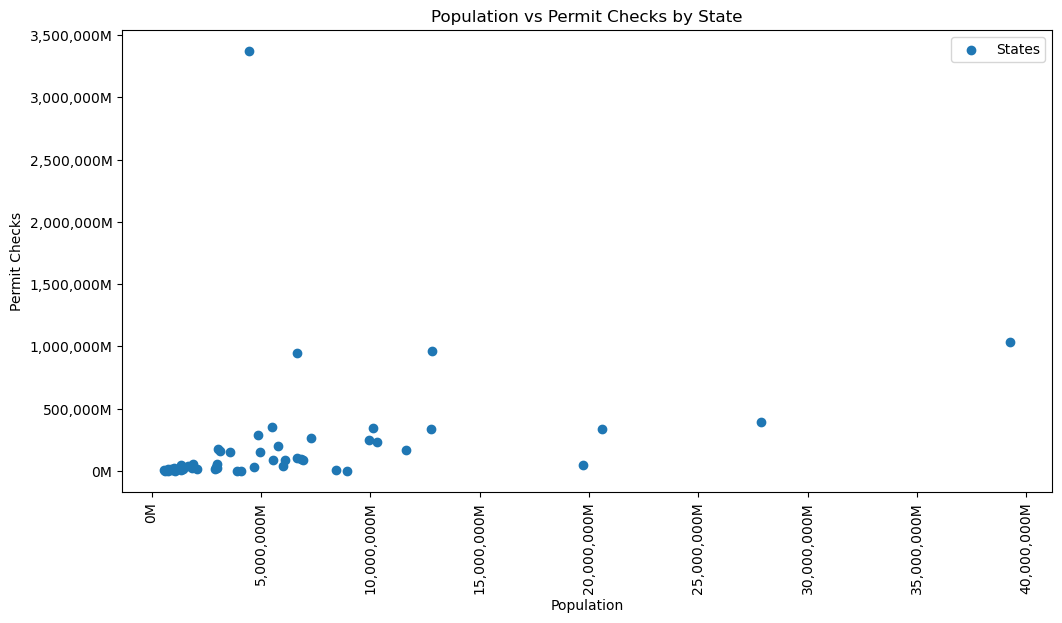

In [53]:
checks = final_df['permit']
population = final_df['Population']

fig, ax = plt.subplots(figsize=(12, 6))

scatter = ax.scatter(population, checks, label = 'States')

plt.legend(loc='best')

fmt = '{x:,.0f}M'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.xaxis.set_major_formatter(tick)

plt.xticks(rotation=90)

plt.xlabel('Population')
plt.ylabel('Permit Checks')
plt.title('Population vs Permit Checks by State')
plt.show()


# Conclusion

To preface the results of my analyses are tentative on the various limitations I encountered when working with the data. To start, the census data only has data collected on 2016 until July and the numbers are estimates. On the other hand, the FBI data was month to month from the entire year of 2016 so the time frames don't match up exactly.

With that being said, there were some interesting insights from the analysis I conducted. I found that the number of gun checks are not necessarily correlated with the population of a state although the scatterplot seems to show somewhat otherwise. For example, Kentucky while not having much of a population compared to the rest of the states had the highest number of permit checks totaling over 3 million. While, California on the other although having a considerable number of permit checks came no where near as close as Kentucky although having a much higher population. I think it is important to note that individual state legislation definitely played an important role in these numbers. However, excluding outliers there is a general positive correlation between population and gun permit checks.